In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Complex Coupling

In [130]:
# The differential equations in the complex coupling are being solved here
def complex_coupling(u,w1,w2,r1,r2,A,theta1,theta2,phi):
    # Calculating the change in r1, r2, theta1, theta2 based on the Hopf conditions ofr complex coupling
    dr1 = (u - r1*r1)*r1 + A*r2*np.cos(theta2 - theta1 + phi)
    dr2 = (u - r2*r2)*r2 + A*r1*np.cos(theta1 - theta2 - phi)
    dtheta1 = w1 + A*(r2/r1)*np.sin(theta2 - theta1 + phi)
    dtheta2 = w2 + A*(r1/r2)*np.sin(theta1 - theta2 - phi)
    return dr1, dr2, dtheta1, dtheta2

In [54]:
def euler_integration(u, w1, w2, r1, r2, A, theta1, theta2, phi, total_time=100, delta_t=0.01):
    """
    The purpose of the total_time is only to calculate the number of iterations
    """
    # delta_t is suggested to be taken small for greater accuracy
    iterations = int(total_time//delta_t)
    # Create empty lists to store the each of the desired values
    # The first values have been added based on the initial conditions for each of the parameters
    ttot = [0]
    r1_val = [r1]
    r2_val = [r2]
    theta1_val = [theta1]
    theta2_val = [theta2]
    for i in range(1,iterations+1):
        # Get the differential equations values by calling the complex coupling function that has all the equations
        dr1_, dr2_, dtheta1_, dtheta2_ = complex_coupling(u,w1,w2,r1,r2,A,theta1,theta2,phi)
        r1 = r1 + delta_t * dr1_
        r2 = r2 + delta_t * dr2_
        theta1 = theta1 + delta_t * dtheta1_
        theta2 = theta2 + delta_t * dtheta2_
        # Append each of these values into the lists, to iteratively store for every delta_t, the change in parameter
        # The change in parameter is governed by the ordinary differential equations
        ttot.append(i)
        r1_val.append(r1)
        r2_val.append(r2)
        theta1_val.append(theta1)
        theta2_val.append(theta2)
        
    return ttot, r1_val, r2_val, theta1_val, theta2_val

#### Case 1: Angular component of coupling coefficient (phi) = -47 degrees

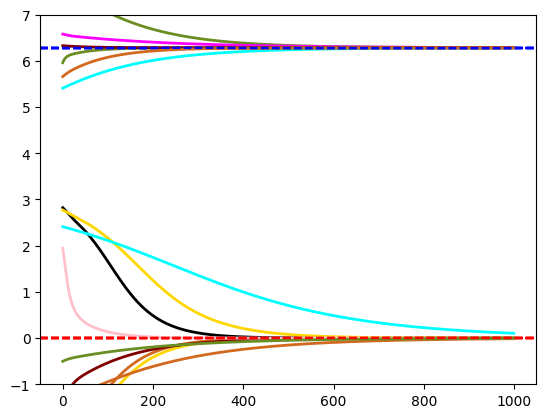

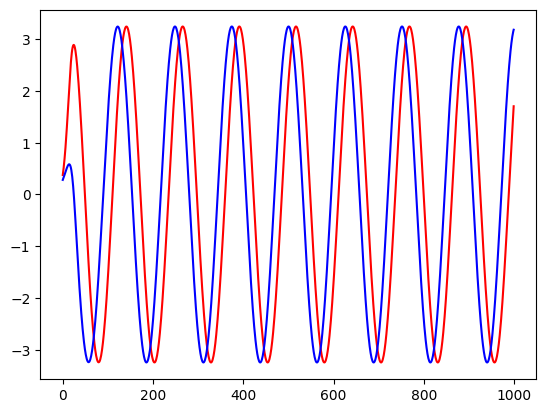

In [108]:
# Colors to differentiate different plots on the same graph
color = ['gold', 'olivedrab', 'magenta', 'chocolate', 'cyan', 'pink', 'maroon', 'black']*5
# Iterating for random 20 cases, to see their convergence
for alpha in range(20):
    # Keeping w1, w2, phi as directed by question and randomly sampling the rest
    u = random.randint(1,10)
    w1 = 5
    w2 = 5
    A = random.random()
    phi = np.radians(-47)
    r1 = 2*random.random()
    theta1 = 10*random.random()
    r2 = 2*random.random()
    theta2 = 10*random.random()

    # Calling the euler integration function to get the solution to ordinary differential equations
    ttot_, r1_, r2_, theta1_, theta2_ = euler_integration(u, w1, w2, r1, r2, A, theta1, theta2, phi)

    # Calculating the phase difference equal to theta1 - theta2 - phi
    # Theoretically, this should converge to zero, because the oscillators adapt this new frequency
    phase_diff = []
    for i in range(len(theta1_)):
        phase_diff.append(theta1_[i] - theta2_[i] - phi)

    # z1 and z2 store the real component of the variable
    z1 = r1_ * np.cos(theta1_)
    z2 = r2_ * np.cos(theta2_)

    # Plotting only the first 1000 iterations to be able to visualize the graphs better
    plt.plot(ttot_[:1000], phase_diff[:1000], color=color[alpha], linewidth=2)
    # Limit is set -1 to 7 because our expected convergence is 0 and 2pi
    plt.ylim(-1,7)
    # Plot the dotted 0 and 2pi lines
    plt.axhline(y=np.radians(0), linestyle="dashed", color="r", label="0")
    plt.axhline(y=2*np.pi, linestyle="dashed", color="b", label="2pi")
    
plt.show()

# Now plot the real components of the variable against time
plt.plot(ttot_[:1000], z1[:1000], color="r")
plt.plot(ttot_[:1000], z2[:1000], color="b")
plt.show()

#### Case 2: Angular component of coupling coefficient (phi) = 98 degrees

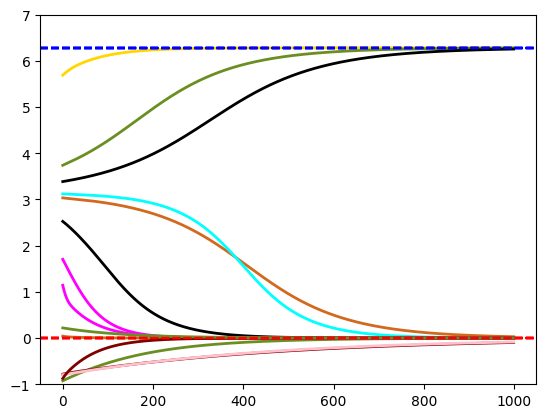

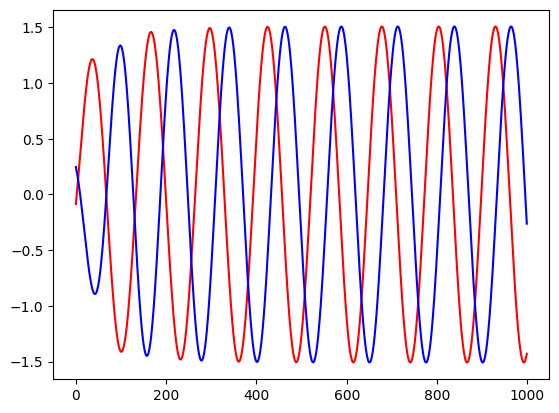

In [99]:
# Colors to differentiate different plots on the same graph
color = ['gold', 'olivedrab', 'magenta', 'chocolate', 'cyan', 'pink', 'maroon', 'black']*5
# Iterating for random 20 cases, to see their convergence
for alpha in range(20):
    # Keeping w1, w2, phi as directed by question and randomly sampling the rest
    u = random.randint(1,10)
    w1 = 5
    w2 = 5
    A = random.random()
    phi = np.radians(98)
    r1 = 2*random.random()
    theta1 = 10*random.random()
    r2 = 2*random.random()
    theta2 = 10*random.random()

    # Calling the euler integration function to get the solution to ordinary differential equations
    ttot_, r1_, r2_, theta1_, theta2_ = euler_integration(u, w1, w2, r1, r2, A, theta1, theta2, phi)

    # Calculating the phase difference equal to theta1 - theta2 - phi
    # Theoretically, this should converge to zero, because the oscillators adapt this new frequency

    phase_diff = []
    for i in range(len(theta1_)):
        phase_diff.append(theta1_[i] - theta2_[i] - phi)

    # z1 and z2 store the real component of the variable
    z1 = r1_ * np.cos(theta1_)
    z2 = r2_ * np.cos(theta2_)

    # Plotting only the first 1000 iterations to be able to visualize the graphs better
    plt.plot(ttot_[:1000], phase_diff[:1000], color=color[alpha], linewidth=2)
    plt.ylim(-1,7)
    # Plot the dotted 0 and 2pi lines
    plt.axhline(y=np.radians(0), linestyle="dashed", color="r", label="0")
    plt.axhline(y=2*np.pi, linestyle="dashed", color="b", label="2pi")
    
plt.show()

plt.plot(ttot_[:1000], z1[:1000], color="r")
plt.plot(ttot_[:1000], z2[:1000], color="b")
plt.show()

Both the plots differ internally only, i.e., in terms of the values of certain fixed parameters. Externally both plots appear the same. No change in graph patterns is observed

## Power Coupling

In [2]:
# Define the derivative equations obtained from theory to solve power coupling
def power_coupling(u, w1, w2, r1, r2, A12, A21, theta1, theta2, phi12, phi21):
    # These equations have been enclosed in the report
    dr1 = (u - r1 * r1) * r1 + A12 * r2**(w1/w2) * np.cos(w1 * ((theta2/w2) - (theta1/w1) + (phi12/(w1*w2))))
    dr2 = (u - r2 * r2) * r2 + A21 * r1**(w2/w1) * np.cos(w2 * ((theta1/w1) - (theta2/w2) + (phi21/(w1*w2))))
    dtheta1 = w1 + A12 * (r2**(w1/w2) / r1) * np.sin(w1 * ((theta2/w2) - (theta1/w1) + (phi12/(w1*w2))))
    dtheta2 = w2 + A21 * (r1**(w2/w1) / r2) * np.sin(w2 * ((theta1/w1) - (theta2/w2) + (phi21/(w1*w2))))
    return dr1, dr2, dtheta1, dtheta2

In [3]:
def euler_integration_power(u, w1, w2, r1, r2, A12, A21, theta1, theta2, phi12, phi21, total_time=100, delta_t=0.01):
    """
    The purpose of the total_time is only to calculate the number of iterations
    """
    # delta_t is suggested to be taken small for greater accuracy.
    iterations = int(total_time//delta_t)
    # Create empty lists to store the each of the desired values
    # The first values have been added based on the initial conditions for each of the parameters
    ttot = [0]
    r1_val = [r1]
    r2_val = [r2]
    theta1_val = [theta1]
    theta2_val = [theta2]
    for i in range(1,iterations+1):
        # Update the values of the differential by calling the power coupling function that stores all these equations
        dr1_, dr2_, dtheta1_, dtheta2_ = power_coupling(u,w1,w2,r1,r2,A12,A21,theta1,theta2,phi12,phi21)
        r1 = r1 + delta_t * dr1_
        r2 = r2 + delta_t * dr2_
        theta1 = theta1 + delta_t * dtheta1_
        theta2 = theta2 + delta_t * dtheta2_
        # Append each of these values into the lists, to iteratively store for every delta_t, the change in parameter
        # The change in parameter is governed by the ordinary differential equations
        ttot.append(i)
        r1_val.append(r1)
        r2_val.append(r2)
        theta1_val.append(theta1)
        theta2_val.append(theta2)
        
    return ttot, r1_val, r2_val, theta1_val, theta2_val

#### Case 1: Angular component of coupling coefficient (phi) = -47 degrees

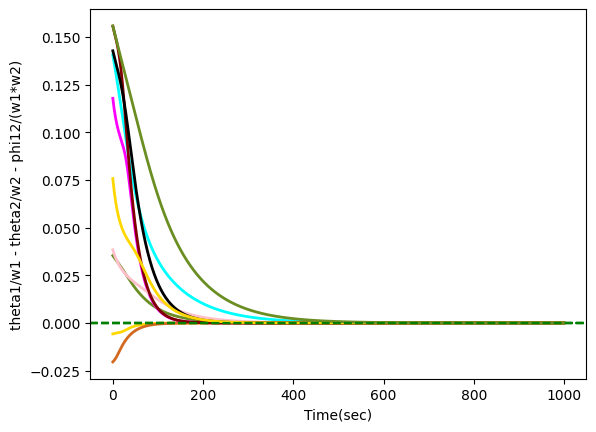

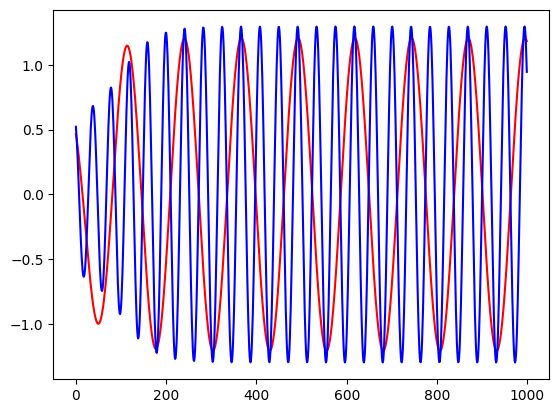

In [12]:
# Colors to differentiate different plots on the same graph
color = ['gold', 'olivedrab', 'magenta', 'chocolate', 'cyan', 'pink', 'maroon', 'black']*5
# Iterating for random 10 cases, to see their convergence
for alpha in range(10):
    # Keeping w1, w2, phi as directed by question and randomly sampling the rest
    u = random.randint(1,10)
    w1 = 5
    w2 = 15
    A12 = 0.5 # Randomly chosen
    A21 = 0.5 # Same as A12
    phi12 = -47*np.pi/180
    phi21 = 47*np.pi/180
    r1 = random.random()
    theta1 = random.random()
    r2 = random.random()
    theta2 = random.random()

    # Calling the euler integration function to get the solution to ordinary differential equations
    ttot_, r1_, r2_, theta1_, theta2_ = euler_integration_power(u, w1, w2, r1, r2, A12, A21, theta1, theta2, phi12, phi21)
    
    # Calculating the phase difference equal to theta1/w1 - theta2/w2 - phi/(w1*w2)
    phase_diff = []
    for i in range(len(theta1_)):
        phase_diff.append(theta1_[i]/w1 - theta2_[i]/w2 - phi12/(w1*w2))

    # z1 and z2 store the real component of the variable
    z1 = r1_ * np.cos(theta1_)
    z2 = r2_ * np.cos(theta2_)

    plt.plot(ttot_[:1000], phase_diff[:1000], color=color[alpha], linewidth=2)
    plt.axhline(y=0, linestyle="dashed", color="g")
#     plt.ylim(-1,7)
plt.xlabel("Time(sec)")
plt.ylabel("theta1/w1 - theta2/w2 - phi12/(w1*w2)")
plt.show()

plt.plot(ttot_[:1000], z1[:1000], color="r")
plt.plot(ttot_[:1000], z2[:1000], color="b")
plt.show()

#### Case 2: Angular component of coupling coefficient (phi) = 98 degrees

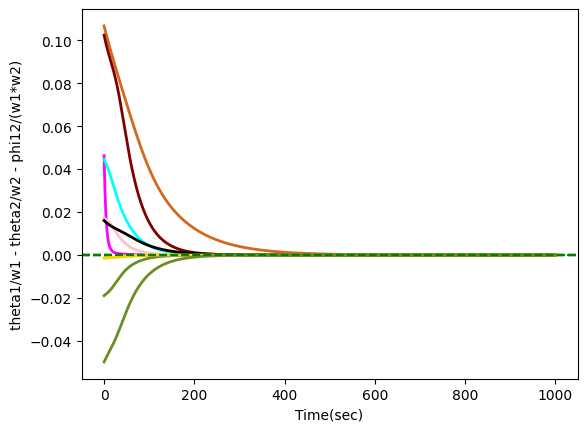

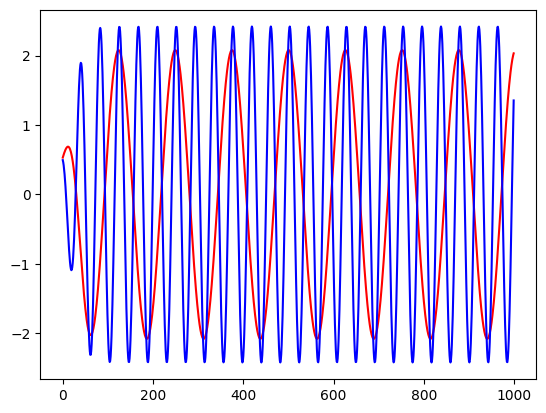

In [11]:
# Colors to differentiate different plots on the same graph
color = ['gold', 'olivedrab', 'magenta', 'chocolate', 'cyan', 'pink', 'maroon', 'black']*5
for alpha in range(10):
    # Keeping w1, w2, phi as directed by question and randomly sampling the rest
    u = random.randint(1,10)
    w1 = 5
    w2 = 15
    A12 = 0.5 # Randomly chosen
    A21 = 0.5 # Same as A12
    phi12 = 98*np.pi/180
    phi21 = -98*np.pi/180
    r1 = random.random()
    theta1 = random.random()
    r2 = random.random()
    theta2 = random.random()

    # Calling the euler integration function to get the solution to ordinary differential equations
    ttot_, r1_, r2_, theta1_, theta2_ = euler_integration_power(u, w1, w2, r1, r2, A12, A21, theta1, theta2, phi12, phi21)
    
    # Calculating the phase difference equal to theta1/w1 - theta2/w2 - phi/(w1*w2)
    phase_diff = []
    for i in range(len(theta1_)):
        phase_diff.append(theta1_[i]/w1 - theta2_[i]/w2 - phi12/(w1*w2))

     # z1 and z2 store the real component of the variable    
    z1 = r1_ * np.cos(theta1_)
    z2 = r2_ * np.cos(theta2_)

    plt.plot(ttot_[:1000], phase_diff[:1000], color=color[alpha], linewidth=2)
    plt.axhline(y=0, linestyle="dashed", color="g")
#     plt.ylim(-1,7)
plt.xlabel("Time(sec)")
plt.ylabel("theta1/w1 - theta2/w2 - phi12/(w1*w2)")
plt.show()

plt.plot(ttot_[:1000], z1[:1000], color="r")
plt.plot(ttot_[:1000], z2[:1000], color="b")
plt.show()

Both the plots differ internally only, i.e., in terms of the values of certain fixed parameters. Externally both plots appear the same. No change in graph patterns is observed